# 머신러닝 모델 적용

1. Logistic Regression: 이진분류라 softmax 함수를 사용해야 함
2. KNN
3. SVM: 초평면으로 데이터 분류
    - 선형 분류
    - 비선형 분류
        - kernel: 비선형 데이터를 고차원 공간으로 변환하는 옵션
            - rbf
            - linear
            - polynomial
            - sigmoid
4. decision tree: 특징의 조건(T/F)에 따라 분할하여 예측
    1. 루트노드: 전체 데이터
    2. 분할: 정보이득 또는 지니불순도 최적화
    3. 리프노드: 규제 조건에 도달시 생성, 클래스 또는 예측 값 할당
    4. 시각화: from sklearn.tree import DecisionTreeClassification
5. Random Forest

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import matplotlib

font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font',family=font)

In [37]:
import warnings
warnings.filterwarnings('ignore')

In [38]:
df= pd.read_csv('./data/cancer_patient_data_sets.csv')
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [39]:
# 상대적으로 연관이 없는 컬럼 삭제하기

related_df = df.drop([
            'index',
            'Patient Id',
            'Gender',
            'Fatigue', 
            'Weight Loss', 
            'Shortness of Breath', 
            'Wheezing', 
            'Swallowing Difficulty', 
            'Clubbing of Finger Nails', 
            'Frequent Cold', 
            'Dry Cough',
            'Snoring'],
            axis=1)

related_df['Level'] = related_df['Level'].map({'Low': 1, 'Medium': 2, 'High': 3})
related_df

,Age,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Level
0,33,2,4,5,4,3,2,2,4,3,2,2,4,1
1,17,3,1,5,3,4,2,2,2,2,4,2,3,2
2,35,4,5,6,5,5,4,6,7,2,3,4,8,3
3,37,7,7,7,7,6,7,7,7,7,7,7,8,3
4,46,6,8,7,7,7,6,7,7,8,7,7,9,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,6,7,7,7,7,6,7,7,7,8,7,7,3
996,37,6,8,7,7,7,6,7,7,7,8,7,7,3
997,25,4,5,6,5,5,4,6,7,2,3,4,8,3
998,18,6,8,7,7,7,6,7,7,8,7,7,9,3


In [40]:
# 데이터셋 분리 및 정규화
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = related_df.drop('Level', axis=1)
y = related_df['Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### KNN - PCA 변환

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# KNN 모델 생성 (k=5)
knn = KNeighborsClassifier()

# 모델 학습
knn.fit(X_train, y_train)

knn_score_train = knn.score(X_train, y_train)
knn_score_test = knn.score(X_test, y_test)
print(f'학습데이터 평가: {knn_score_train}')
print(f'테스트데이터 평가: {knn_score_test}')

학습데이터 평가: 0.992
테스트데이터 평가: 0.992


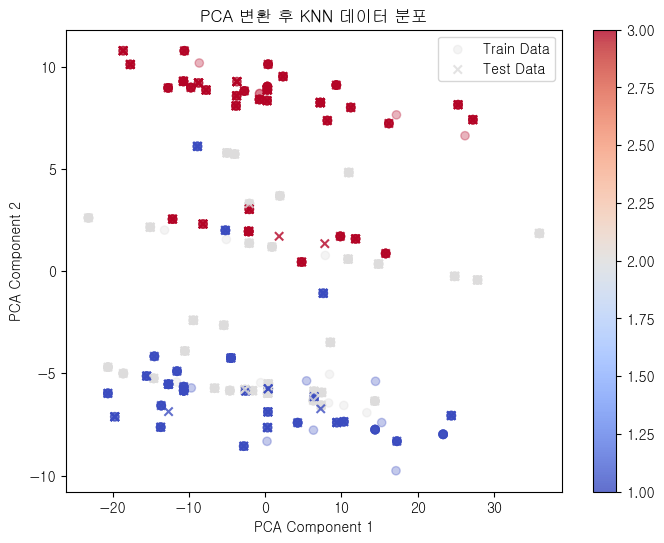

In [68]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# PCA를 사용하여 데이터 차원 축소 (2D 변환)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# PCA 변환한 데이터로 KNN 학습
knn_pca = KNeighborsClassifier(n_neighbors=10)
knn_pca.fit(X_train_pca, y_train)

# 산점도 그래프
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='coolwarm', label='Train Data', alpha=0.3)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='coolwarm', edgecolors='k', marker='x', label='Test Data', alpha=0.8)

plt.title('PCA 변환 후 KNN 데이터 분포')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.colorbar()
plt.show()


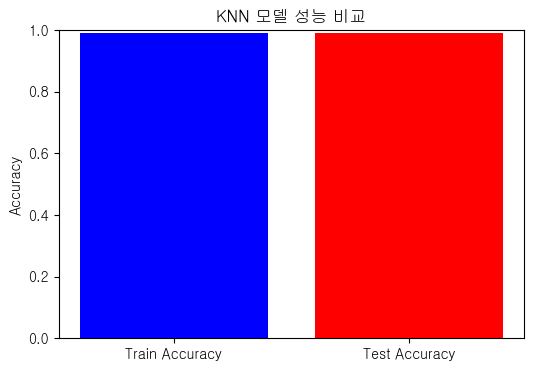

In [60]:
import matplotlib.pyplot as plt

scores = [knn_score_train, knn_score_test]
labels = ['Train Accuracy', 'Test Accuracy']

plt.figure(figsize=(6, 4))
plt.bar(labels, scores, color=['blue', 'red'])
plt.ylim(0, 1)  # 정확도 범위는 0~1
plt.title('KNN 모델 성능 비교')
plt.ylabel('Accuracy')
plt.show()


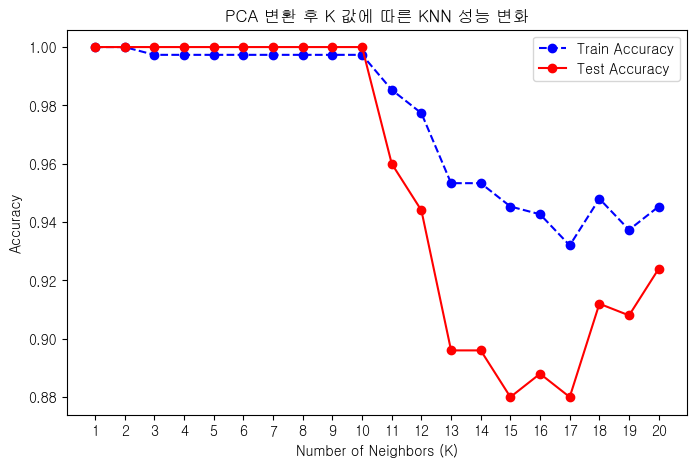

In [77]:
from sklearn.model_selection import cross_val_score
import numpy as np

k_values = range(1, 21)
train_scores = []
test_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_scores.append(knn.score(X_train_scaled, y_train))
    test_scores.append(knn.score(X_test_scaled, y_test))

plt.figure(figsize=(8, 5))
plt.plot(k_values, train_scores, label='Train Accuracy', marker='o', linestyle='--', color='blue')
plt.plot(k_values, test_scores, label='Test Accuracy', marker='o', linestyle='-', color='red')
plt.xticks(k_values)
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('PCA 변환 후 K 값에 따른 KNN 성능 변화')
plt.legend()
plt.show()


- K가 작으면 과대대적합, K가 크면 과소적합
- 교차 검증(Cross Validation) 을 사용하면 최적의 K를 찾는 데 도움

### KNN - LDA 변환

In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

# 데이터 정규화 (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# LDA 변환 (2D 차원 축소)
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

# KNN 모델 학습
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_lda, y_train)

# KNN 모델 평가
knn_score_train = knn.score(X_train_lda, y_train)
knn_score_test = knn.score(X_test_lda, y_test)

# 결과 출력
print(f'LDA 변환 후 학습 데이터 평가: {knn_score_train:.4f}')
print(f'LDA 변환 후 테스트 데이터 평가: {knn_score_test:.4f}')


LDA 변환 후 학습 데이터 평가: 0.9987
LDA 변환 후 테스트 데이터 평가: 0.9960


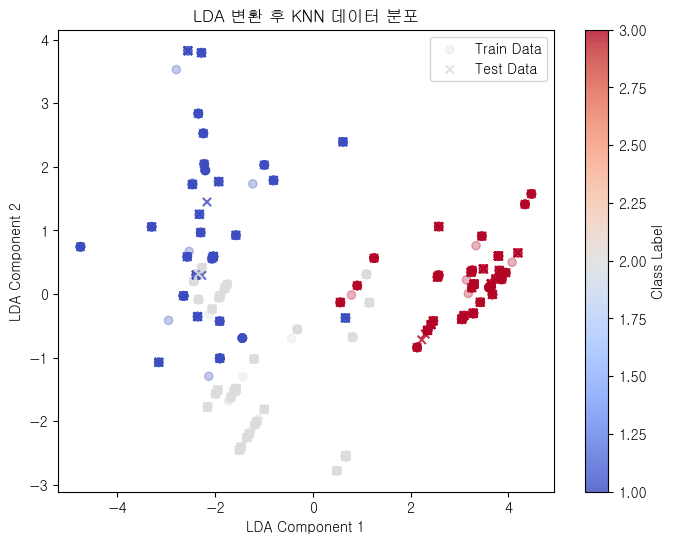

In [74]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# 훈련 데이터
plt.scatter(X_train_lda[:, 0], X_train_lda[:, 1], c=y_train, cmap='coolwarm', alpha=0.3, label='Train Data')

# 테스트 데이터 (X 마커, 검은색 엣지 강조)
plt.scatter(X_test_lda[:, 0], X_test_lda[:, 1], c=y_test, cmap='coolwarm', edgecolors='k', marker='x', alpha=0.8, label='Test Data')

plt.title('LDA 변환 후 KNN 데이터 분포')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.legend()
plt.colorbar(label='Class Label')
plt.show()


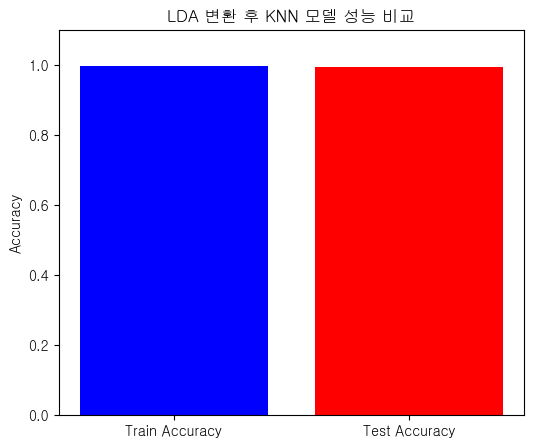

In [80]:
# KNN 모델 평가 결과 시각화
plt.figure(figsize=(6, 5))
plt.bar(['Train Accuracy', 'Test Accuracy'], [knn_score_train, knn_score_test], color=['blue', 'red'])
plt.ylim(0, 1.1)  # 0~1.1 범위 설정하여 보기 편하게 조정
plt.title('LDA 변환 후 KNN 모델 성능 비교')
plt.ylabel('Accuracy')
plt.show()


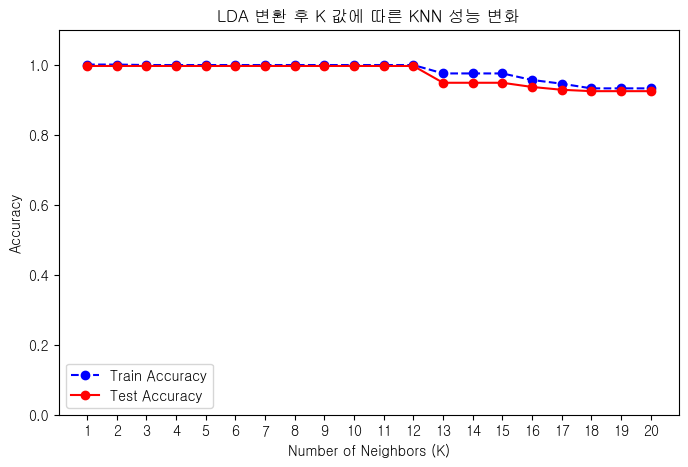

In [79]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# K 값에 따른 정확도 변화 분석
k_values = range(1, 21)
train_scores = []
test_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_lda, y_train)
    train_scores.append(knn.score(X_train_lda, y_train))
    test_scores.append(knn.score(X_test_lda, y_test))

# 꺾은선 그래프
plt.figure(figsize=(8, 5))
plt.plot(k_values, train_scores, label='Train Accuracy', marker='o', linestyle='--', color='blue')
plt.plot(k_values, test_scores, label='Test Accuracy', marker='o', linestyle='-', color='red')

plt.xticks(k_values)
plt.ylim(0, 1.1)  # 0~1.1 범위로 조정
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('LDA 변환 후 K 값에 따른 KNN 성능 변화')
plt.legend()
plt.show()


- 차원의 저주 해결


### Logistic Regression
**다중 클래스 확률 계산 순서**
1. 샘플에 대한 회귀 결과 z 계산
2. 소프트맥스 함수 적용
    - z를 e의 지수로 적용해 값을 확대(클래스별 z의 차이를 극대화)
    - 합을 각 클래스의 값으로 나눠 비율을 계산하고 반환
3. 가장 높은 확률 값을 가진 클래스 선택

In [42]:
# 모델 학습 및 평가
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()

lr_clf.fit(X_train_scaled, y_train)
print("훈련:", lr_clf.score(X_train_scaled, y_train))
print("평가:", lr_clf.score(X_test_scaled, y_test))

# 예측
y_pred = lr_clf.predict(X_test_scaled[:5])

y_pred_proba = lr_clf.predict_proba(X_test_scaled[:5])
# print(y_pred_proba)
# print(y_pred_proba.sum(axis=1))

pred = np.argmax(y_pred_proba, axis=1)
# print(pred)

W = lr_clf.coef_
b = lr_clf.intercept_
W.shape, b.shape    # (3, 13), (3,)

# 결정함수
Z = lr_clf.decision_function(X_test_scaled[122:132])
print("결정함수:", Z)

np.set_printoptions(suppress=True)
# softmax 함수
def softmax(z):
    z_max = np.max(z, axis=1, keepdims=True)
    exp_z = np.exp(z - z_max)
    sum_exp_z = np.sum(exp_z, axis=1, keepdims=True)
    return exp_z / sum_exp_z

P = softmax(Z)
print("확률값:", P)

label = lr_clf.classes_[np.argmax(P, axis=1)]
print("lable", label)

훈련: 0.8373333333333334
평가: 0.88
결정함수: [[ 2.32415778  1.64516457 -3.96932235]
 [ 2.81860784  3.72045262 -6.53906046]
 [-0.38981946  0.67098836 -0.2811689 ]
 [-5.09946375 -2.94308521  8.04254896]
 [-5.82773958 -1.16405205  6.99179163]
 [-4.65070842 -1.44521563  6.09592405]
 [-3.6913781   0.03569445  3.65568365]
 [-4.10049604 -1.45807469  5.55857073]
 [ 5.76596198  1.36427991 -7.13024189]
 [ 0.71578209  3.48958811 -4.20537019]]
확률값: [[0.66270123 0.33607389 0.00122488]
 [0.28866435 0.71131074 0.00002491]
 [0.19986104 0.57733931 0.22279964]
 [0.00000196 0.00001694 0.9999811 ]
 [0.00000271 0.00028697 0.99971032]
 [0.00002151 0.0005305  0.99944799]
 [0.00062728 0.02606799 0.97330473]
 [0.00006378 0.00089597 0.99904025]
 [0.98788925 0.01210827 0.00000248]
 [0.05873101 0.9408408  0.00042819]]
lable [1 2 2 3 3 3 3 3 1 2]


### KNN

### SVM

In [43]:
# SVM
# 데이터준비
# 훈련/테스트 데이터 분리
X = iris_data.data[:, :2]
y = iris_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 모델 학습 및 평가
# 예측


NameError: name 'iris_data' is not defined

### Decision Tree

### Random Forest